In [1]:
import math

## PHYSICAL CONSTANTS 
R      = 8.3145  # J/mol-K, ideal gas constant
T      = 298.15  # K, temperature
F      = 96485   # C/mol, Faraday's constant
S      = 1E-6   #  electrode surface. Default = 1E-6
F_norm = F/(R*T)


## INDEPENDENT VARIABLES 
### EXPERIMENTALLY CONTROLED
C_a   = 1.0    #  mol/L, initial concentration of A. Default = 1.0
C_b   = 0.0    #  mol/L, initial concentration of B. Default = 0.0
C_c   = 0.0    #  mol/L, initial concentration of C. Default = 0.0
C_d   = 0.0    #  mol/L, initial concentration of D. Default = 0.0
n_sp  = 4      # number of reactive species considered

### SYSTEM DEPENDENT
E_0_1        = -0.5    #  electrochemical potential couple A/B. Default = 0.0
E_0_2        = -0.4    #  electrochemical potential couple C/D. Default = -1.0
D            = 1E-5   #  cm^2/s, O & R diffusion coefficient. Default = 1E-5
n            = 1.0    #  number of electrons transfered. Default = 1
alpha        = 0.5    #  dimensionless charge-transfer coefficient. Default = 0.5
k0           = 1E-2   #  cm/s, electrochemical rate constant. Default = 1E-2
kc           = 1E-3   #  1/s, chemical rate constant. Default = 1E-3
k_p          = 1      #  1/s, chemical rate constant. Default = 1E-3
k_m          = 1      #  1/s, chemical rate constant. Default = 1E-3
K      = k_p/k_m      #  dimensionless equilibrium constant for the pure chemical equilibria

## SIMULATION VARIABLES
# simulation accuracy in time and space
Nt      = 10000      # number of iterations per t_k (pg 790). Default = 500
Nx      = 100        # number of spatial boxes  Default = 200

# key adimensionnated parameters
DM      = 0.45        #DM = D*Dt/Dx**2 numerical adimensionated diffusion parameter. Default = 0.45
Lambda  = 100         #Lambda  = k0*Dx/D numerical adimensionated electron transfer parameter. Fast if 

# physical distances according to the previosu parameters
L_cuve  = math.floor((D*Nt)**0.5) + 2 # longueur physique de la cuve so that we are always in a diffusion controled system
Dx      = L_cuve/Nx  # pas d'espace

## Experimental paramteres in the case of a linear sweep voltammetry
## LSV
E_i     = 0
E_ox    = 0.1
E_red   = -1
E_SW    = 0.05
Delta_E = -0.01
v       = 0.1
f       = 25
tau     = 1.0


import numpy as np
import matplotlib.pyplot as plt

# sort all variables in order to be used in the next programms

cst_phys = (R,T,F,F_norm,S)
cst_conc = (C_a, C_b, C_c, C_d, n_sp)
cst_syst = (E_0_1, D, n, alpha, k0, kc, k_p, k_m, K, E_0_2)
cst_expe = (E_ox, E_red, E_SW, Delta_E, v, f, tau, E_i)
cst_simu = (Nt, Nx, DM, Lambda, L_cuve, Dx)
cst_all  = (cst_phys, cst_conc, cst_syst, cst_simu, cst_expe)

In [2]:
#from plot_voltammogram_ECE import main_LSV_ECE
#I = main_LSV_ECE(cst_all)

DM =  0.45 and lambda =  100


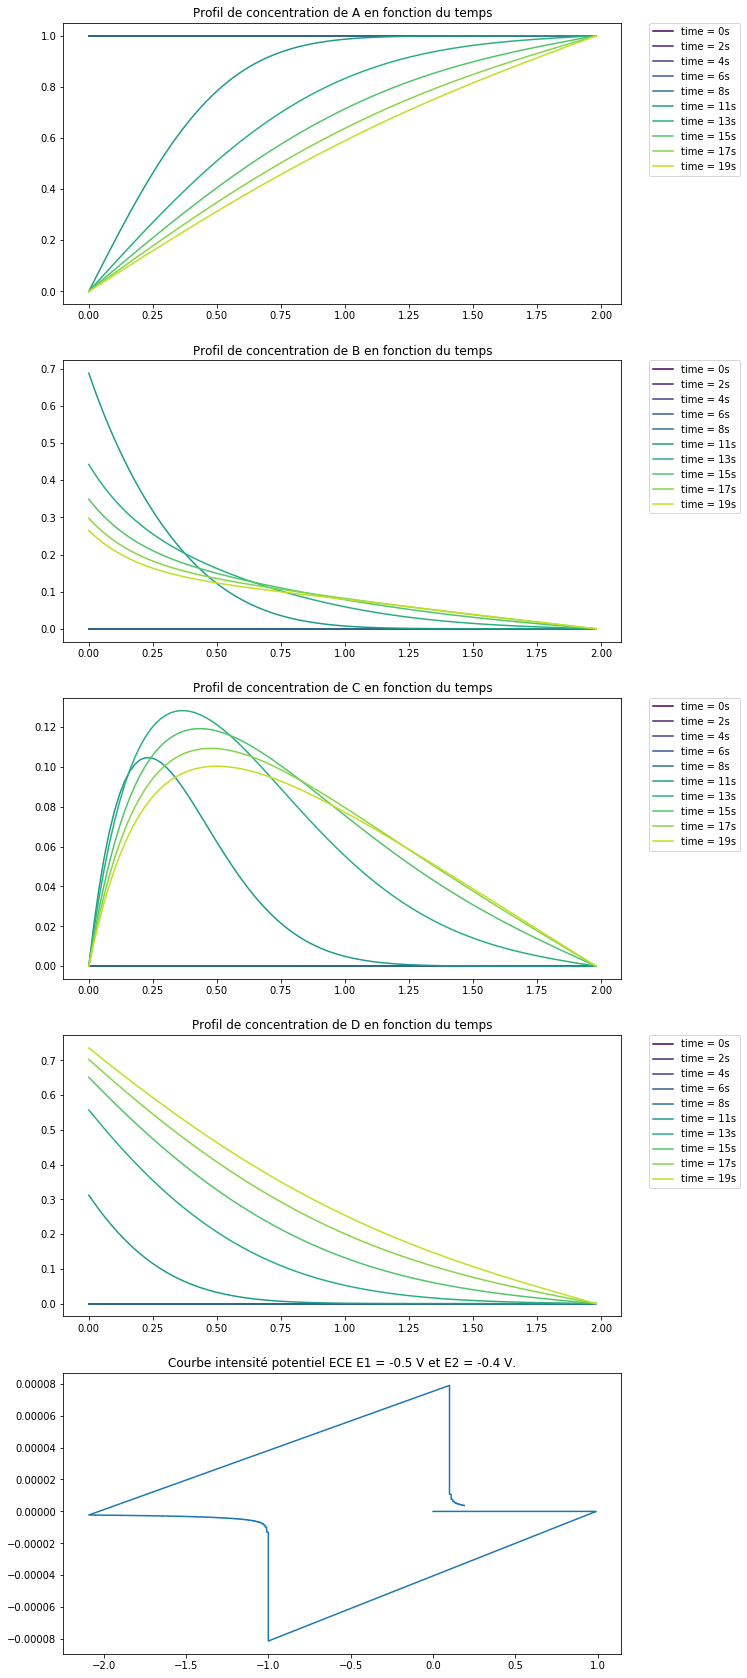

In [3]:
from plot_voltammogram_ECE import main_CSV_ECE
I_CSV = main_CSV_ECE(cst_all)

In [4]:
from plot_voltammogram_ECE import extract_expe_like_CSV

E_expe, I_expe = extract_expe_like_CSV(cst_all, I_CSV)

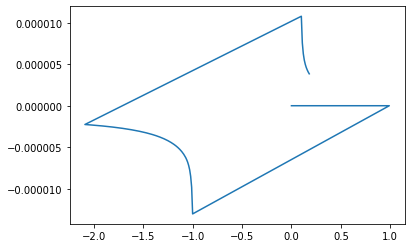

In [5]:
plt.plot(E_expe, I_expe)